In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
observations = 1000
xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generate_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations, 1))
generate_targets = 2*xs - 3*zs + 5 + noise

#tensorflow doesn't work well with .xlxs or .csv so we want a format that can store the information in tensors
#np.savez, saves n-dimensional array in .npz format, using a certain keyword(label) for each array
np.savez('TF_intro', inputs = generate_inputs, target = generate_targets)

#data -> preprocessing ->save in .npz

### Solving with Tensorflow 
- Prepare the data
- Build a model
- Create objective function
- Optimization algorithm

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2 #xs, zs
output_size = 1  #y

model = tf.keras.Sequential([
    #take the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias 
    #we can set the output_size, kernel_initializer, bias_initiallizer
    tf.keras.layers.Dense(output_size,
                          kernel_initializer = tf.random_uniform_initializer(-0.1,0.1),
                          bias_initializer = tf.random_uniform_initializer(-0.1,0.1)
                         )
])
#build custom optimizer, watch the documentation tf.keras.optimizers.SGD
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

#in this case we use SGD (stochastic Gradient Descent as opt2*xs - 3*zs + 5imizer, another optimizer Adam, Adamax, RMSprop, etc
#L2-norm loss = least sum of squared error, just watch the decumentation tf.keras.losses
model.compile(optimizer=custom_optimizer, loss='mean_squared_error') #2 parameter optimizer and loss

#verbose 0, means not showing the loss value, 1 show, 2 + time
model.fit(training_data['inputs'], training_data['target'], epochs=200, verbose=2)

Epoch 1/200
32/32 - 0s - loss: 55.3571
Epoch 2/200
32/32 - 0s - loss: 1.1375
Epoch 3/200
32/32 - 0s - loss: 0.4673
Epoch 4/200
32/32 - 0s - loss: 0.3972
Epoch 5/200
32/32 - 0s - loss: 0.3819
Epoch 6/200
32/32 - 0s - loss: 0.3829
Epoch 7/200
32/32 - 0s - loss: 0.3757
Epoch 8/200
32/32 - 0s - loss: 0.4086
Epoch 9/200
32/32 - 0s - loss: 0.3829
Epoch 10/200
32/32 - 0s - loss: 0.4275
Epoch 11/200
32/32 - 0s - loss: 0.3880
Epoch 12/200
32/32 - 0s - loss: 0.3935
Epoch 13/200
32/32 - 0s - loss: 0.3616
Epoch 14/200
32/32 - 0s - loss: 0.3880
Epoch 15/200
32/32 - 0s - loss: 0.3797
Epoch 16/200
32/32 - 0s - loss: 0.4216
Epoch 17/200
32/32 - 0s - loss: 0.3783
Epoch 18/200
32/32 - 0s - loss: 0.3500
Epoch 19/200
32/32 - 0s - loss: 0.3811
Epoch 20/200
32/32 - 0s - loss: 0.3860
Epoch 21/200
32/32 - 0s - loss: 0.3606
Epoch 22/200
32/32 - 0s - loss: 0.3890
Epoch 23/200
32/32 - 0s - loss: 0.3776
Epoch 24/200
32/32 - 0s - loss: 0.3611
Epoch 25/200
32/32 - 0s - loss: 0.3984
Epoch 26/200
32/32 - 0s - loss: 0

## Extract the weights and bias 

In [5]:
model.layers[0].get_weights()

[array([[ 2.0288258],
        [-2.9779806]], dtype=float32),
 array([4.9832363], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0288258],
       [-2.9779806]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9832363], dtype=float32)

2*xs - 3*zs + 5
we get 2.002 and -3.008 with bias 5.04 so close

## Extract the outputs (make predictions) 

In [8]:
model.predict_on_batch(training_data['inputs']).round(1) #1 decimal number

array([[ -1.9],
       [ -9. ],
       [-32.7],
       [  6.6],
       [-13.6],
       [ 19.8],
       [ 19.3],
       [ -8.3],
       [ 13.4],
       [ 12.8],
       [-20.4],
       [ -4. ],
       [-10.9],
       [-43.1],
       [ 12.3],
       [-14.6],
       [ -5.8],
       [ 40.3],
       [-27.7],
       [-12.6],
       [  3.4],
       [-25.2],
       [ 12. ],
       [-23.7],
       [-16.4],
       [  2.5],
       [  8.4],
       [ -3.1],
       [-21.5],
       [  2.7],
       [-14.3],
       [ 24.7],
       [-30.8],
       [-16.8],
       [ 22. ],
       [ -4.8],
       [ 11.7],
       [-19.2],
       [-29.9],
       [  2.7],
       [  4.6],
       [ 44.3],
       [ 40.8],
       [ -3.9],
       [ -5.9],
       [  1.7],
       [ 18. ],
       [-19.3],
       [ -4.4],
       [  1.1],
       [-22.2],
       [  1.4],
       [ 10.2],
       [  3.6],
       [ 13. ],
       [ 42.5],
       [ 45.9],
       [-17.4],
       [  1.4],
       [ -5.2],
       [ 45.9],
       [ 10.1],
       [

In [9]:
training_data['target'].round(1)

array([[ -1.2],
       [ -9. ],
       [-32.6],
       [  7.7],
       [-14.5],
       [ 20.8],
       [ 20. ],
       [ -8.9],
       [ 13.8],
       [ 13.2],
       [-21.5],
       [ -5. ],
       [-10.8],
       [-43.1],
       [ 12.9],
       [-14.4],
       [ -6.8],
       [ 39.8],
       [-27.6],
       [-12.2],
       [  3.7],
       [-26. ],
       [ 11.9],
       [-24.8],
       [-15.8],
       [  2.8],
       [  7.8],
       [ -4.1],
       [-20.5],
       [  2.5],
       [-15.2],
       [ 25. ],
       [-29.7],
       [-17.2],
       [ 21.2],
       [ -5.7],
       [ 10.7],
       [-19.2],
       [-29.8],
       [  3. ],
       [  4.7],
       [ 43.4],
       [ 41.5],
       [ -2.9],
       [ -6.7],
       [  1.1],
       [ 18.1],
       [-18.6],
       [ -3.6],
       [  0.5],
       [-22.4],
       [  1.5],
       [ 10.4],
       [  4.1],
       [ 12.9],
       [ 41.8],
       [ 45. ],
       [-18. ],
       [  0.9],
       [ -6.1],
       [ 45.4],
       [ 10.7],
       [

## Plotting the  data 

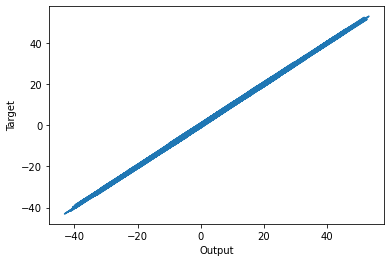

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['target']))
plt.xlabel('Output')
plt.ylabel('Target')
plt.show()